---
# Homework #2
##ANLY590 - Neural Nets & Deep Learning
###Kate Bosshart - KEB289@Georgetown.edu - due October 27, 2019    
---

In [2]:
from IPython.display import Math, HTML, SVG

import numpy as np
from __future__ import division
import random
from time import time

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from keras import Sequential
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import RMSprop

import keras.backend as K

from mpl_toolkits import mplot3d


Using TensorFlow backend.


In [0]:
#######################
#   Helper functions  #
#######################
# Linear activation
def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

# Sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

# Logistic unit
def logistic(x,w,b):
    s = sigmoid(a(x,w,b))
    y = np.round(s)
    return np.array([y,s]).T
  
# ReLu function
def ReLU(x):
    return x * (x > 0)
def dReLU(x):
    return 1. * (x > 0)



---



### 1. FEEDFORWARD: BUILDING A RELU NEURAL NETWORK

 **Consider a rectified linear activation function:**  $$h_j = max(0, a_j)$$

**1.1 Draw a network with 2 inputs, 1 hidden layer with 3 hidden units, and 1-class output for binary classification**

https://drive.google.com/open?id=1-xx1Ehy4hQa9CBtzybCkZKlY9OoqQrkb

*input vector:* $$\vec{x}_{1x2} = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}$$



*weights for input to hidden layer:* $$W_{2x3}  = \begin{bmatrix} w_{11} & w_{12} & w_{13}  \\ w_{21} & w_{22} & w_{23} \end{bmatrix}$$

*bias for hidden layer:* $$\vec{b}_{1x3} = \begin{bmatrix} b_1 \\ b_2\\ b_3\end{bmatrix}$$

*weights for output to hidden layer:* $$\vec{v}_{1x3}  =\begin{bmatrix}v_1 \\ v_2 \\ v_3\end{bmatrix}$$

*bias for output:* $$\vec{b}_{1x1} = \begin{bmatrix} b_y\end{bmatrix}$$

**1.2 Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).**



$$ \hat{y_i}(x_1, x_2) = \sigma ( v_1 h_1 + v_2 h_2 + v_3h_3 + b_y )$$


$$= \sigma ( v_1 f(x_1 w_{11}+ x_2 w_{21}+ b_1)+ v_2 f(x_1 w_{12} + x_2 w_{22}+ b_2) + v_3 f(x_1 w_{13} + x_2 w_{23}+ b_3) + b_y )$$


where sigma is the sigmoid function and f is the rectified linear activation function





**1.3 Write out the forward-pass function in python, call it ff_nn__ReLu(…)**

In [0]:
## Neural net with ReLu activation and binary output

def ff_nn__ReLu(x, w, v, b_1, b_2):

    # Setting up our output y
    num_rows,num_columns = x.shape
    y = np.zeros((num_rows))
    
    for i in range(num_rows):
        x_i = x[i,:]
        
        # Linear activations into hidden units
        a1 = x_i[0]*w[0,0] + x_i[1]*w[1,0] + b_1[0]
        a2 = x_i[0]*w[0,1] + x_i[1]*w[1,1] + b_1[1]
        a3 = x_i[0]*w[0,2] + x_i[1]*w[1,2] + b_1[2]
        
        # output of hidden units
        h_1 = ReLU(a1)
        h_2 = ReLU(a2)
        h_3 = ReLU(a3)
        h = np.array([h_1,h_2,h_3])
        
        # Output of network
        y[i] = sigmoid(h_1*v[0] + h_2*v[1] + h_3*v[2] + b_2)
    
    return np.array(y)

**1.4 Suppose that you have the following set of weight matrices and inputs. What are the class probabilities associated with forward pass of each sample?**

Suppose you have the following weight matricies:

$$W^{(1)}  = \begin{bmatrix} 1 & -1 & 0  \\ 0 & 0 & 0.5 \end{bmatrix}$$

$${b}^{(1)} = \begin{bmatrix} 0 & 0 & 1\end{bmatrix}^{T}$$

$$V  =\begin{bmatrix}1 \\ 0 \\ -1\end{bmatrix}$$

$$c  =\begin{bmatrix}1\end{bmatrix}$$

and a few inputs: 
$$ X = \begin{bmatrix} 1 & -1 \\ 0 & -1 \\ 0 & 1 \end{bmatrix}$$

When applying the weights to our function, we get the following reduced equation where sigma is the sigmoid function and f is the rectified linear activation function: $$\hat{y_i}(x_1, x_2) =   \sigma( f(x_1) - f(0.5x_2 + 1) + 1)$$



In [0]:
w = np.array([[1, -1, 0],[0 , 0., 0.5]])
v = np.array([1,0,-1])  
b_1 = np.array([0,0,1])
b_2 = np.array([1])

For the first input, (1, -1), we solve as follows:

$$\hat{y_i}(1, -1) =    f(1) - f(0.5*(-1) + 1) + 1$$
$$= max(0,1) - max(0, 0.5) + 1$$
$$ = 1 - 0.5 + 1$$
$$ = 1.5$$



In [0]:
sigmoid(1.5)

0.8175744761936437

In [32]:
# Alternatively, use our function:

#x = np.array([1,-1])
num_samples = 1
x = np.array([1,-1]).reshape(num_samples,2)
x

ff_nn__ReLu(x, w, v, b_1, b_2)

array([0.81757448])

For the input (1,-1) the associated class probability is 0.8176 - same answer when we plug into our formula, or when we use our helper functions.

For the second input, (0, -1), we solve as follows: 

$$\hat{y_i}(0, -1) =    f(0) - f(0.5*(-1) + 1) + 1$$
$$= max(0,0) - max(0, 0.5) + 1$$
$$ = - 0.5 + 1$$
$$ = 0.5$$



In [0]:
sigmoid(0.5)

0.6224593312018546

In [33]:
# Alternatively, use our function:

num_samples = 1
x = np.array([0,-1]).reshape(num_samples,2)
x

ff_nn__ReLu(x, w, v, b_1, b_2)

array([0.62245933])

For the input (0,-1) the associated class probability is 0.6225 - same answer when we plug into our formula, or when we use our helper functions.

For the last input, (0, 1), we solve as follows:

$$\hat{y_i}(0, -1) =    f(0) - f(0.5*(1) + 1) + 1$$
$$= max(0,0) - max(0, 1.5) + 1$$
$$ = - 1.5 + 1$$
$$ = -0.5$$

In [0]:
sigmoid(-0.5)

0.3775406687981454

In [34]:
# Alternatively, use our function:

num_samples = 1
x = np.array([0,1]).reshape(num_samples,2)
x

ff_nn__ReLu(x, w, v, b_1, b_2)

array([0.37754067])

For the input (0,1) the associated class probability is 0.3775 - same answer when we plug into our formula, or when we use our helper functions.



---



### 2. GRADIENT DESCENT

Consider a simple non-convex function of two variables:
$$f(x,y) = (1-x^{3}) + 100 * (y^{2}-x)^{2}$$

**2.1 What are the partial derivatives of f with respect to x and y?**

$$d/dx [(1-x^{3}) + 100 * (y^{2}-x)^{2}]$$
$$= -3x^{2}+200x - 200 y^{2}$$

$$d/dy [(1-x^{3}) + 100 * (y^{2}-x)^{2}]$$
$$= 400y (y^{2}-x)$$

**2.2 Create a visualization of the contours of the Rosenbrock function.**

In [0]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1 + x)**3 + 100*(y - x**2)**2

In [0]:
#fig, ax = plt.subplots()
#CS = ax.contour(X, Y, Z)

**2.3 Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.**

In [0]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2)+200*x - 200*(y**2)
    df_dy = 400*y*((y**2)-x)
    return np.array([df_dx, df_dy])

In [0]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

In [63]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=2)
traj

#fig, ax = plt.subplots()
#CS = ax.contour(X, Y, Z)
#x= traj[:,0]
#y= traj[:,1]
#plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


array([[ 5.42641287e+000, -9.58496101e+000],
       [ 3.47601281e+004,  6.62848475e+005],
       [ 1.75754476e+014, -2.32987562e+020],
       [ 2.17132817e+043,  1.01178491e+064],
       [ 4.09483486e+130, -8.28618427e+194],
       [             inf,              inf],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [             nan,              nan],
       [  

**2.4 Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorthim’s hyperparameters.**

In [0]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

In [0]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, learning_rate=2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')



---



### 3. BACKPROP

**3.1 For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.**


$$ \hat{y_i}(x_1, x_2) = \sigma ( v_1 h_1 + v_2 h_2 + v_3h_3 + b_y )$$


$$= \sigma ( v_1 f(x_1 w_{11}+ x_2 w_{21}+ b_1)+ v_2 f(x_1 w_{12} + x_2 w_{22}+ b_2) + v_3 f(x_1 w_{13} + x_2 w_{23}+ b_3) + b_y )$$


where sigma is the sigmoid function and f is the rectified linear activation function


For our function, we have 13-dimensional parameter space (13 weights), meaning we will need to calculate 13 partial derivatives:

$$ \theta = \{{w_{11}, w_{12}, w_{13},w_{21}, w_{22}, w_{23},b_1, b_2, b_3, v_{1}, v_{2}, v_{3}, b_y}\}$$

$$ \nabla_{\theta} = \{{\frac{dL}{dw_{11}}, \frac{dL}{dw_{12}}, \frac{dL}{dw_{13}}, \frac{dL}{dw_{21}}, \frac{dL}{dw_{22}}, \frac{dL}{dw_{23}}, \frac{dL}{db_1}, \frac{dL}{db_2}, \frac{dL}{db_3}, \frac{dL}{dv_{1}}, \frac{dL}{dv_{2}}, \frac{dL}{dv_{3}}, \frac{dL}{db_y}}\}$$

We define each of these 16 partial derivatives as follows, 

Partial Derivatives of the Loss with respect to the weights into the 1st hidden node in the hidden layer are defined as follows, 

$$ \frac{dL}{dw_{11}}  = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h1}} * \frac{dout_{x1}}{din_{h1}}* \frac{din_{h1}}{dw_{11}} = -(y_i - \hat{y}(x_1)) * v_1 * [\sigma(in_{h1})*(1-\sigma(in_{h1})] * x_1$$

$$ \frac{dL}{dw_{21}}  = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h1}} * \frac{dout_{x2}}{din_{h1}}* \frac{din_{h1}}{dw_{21}} = -(y_i - \hat{y}(x_2)) * v_1 * [\sigma(in_{h1})*(1-\sigma(in_{h1})] * x_2$$

Partial Derivatives of the Loss with respect to the weights into the 2nd hidden node in the hidden layer are defined as follows, 

$$ \frac{dL}{dw_{12}}  = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h2}} * \frac{dout_{x1}}{din_{h2}}* \frac{din_{h2}}{dw_{12}} = -(y_i - \hat{y}(x_1)) * v_2 * [\sigma(in_{h2})*(1-\sigma(in_{h2})] * x_1$$

$$ \frac{dL}{dw_{22}}  = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h2}} * \frac{dout_{x2}}{din_{h2}}* \frac{din_{h2}}{dw_{22}} = -(y_i - \hat{y}(x_2)) * v_2 * [\sigma(in_{h2})*(1-\sigma(in_{h2})] * x_2$$

Partial Derivatives of the Loss with respect to the weights into the 3rd hidden node in the hidden layer are defined as follows, 

$$ \frac{dL}{dw_{13}}  = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h3}} * \frac{dout_{x1}}{din_{h3}}* \frac{din_{h3}}{dw_{13}} = -(y_i - \hat{y}(x_1)) * v_3 * [\sigma(in_{h3})*(1-\sigma(in_{h3})] * x_1$$

$$ \frac{dL}{dw_{23}}  = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h3}} * \frac{dout_{x2}}{din_{h3}}* \frac{din_{h3}}{dw_{23}} = -(y_i - \hat{y}(x_2)) * v_3 * [\sigma(in_{h3})*(1-\sigma(in_{h3})] * x_2$$

Partial Derivatives of the Loss with respect to the biases are defined as follows, 

$$ \frac{dL}{db_{1}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h1}} * \frac{dout_{h1}}{din_{h1}}* \frac{din_{h1}}{db_{1}} $$

$$ \frac{dL}{db_{2}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h2}} * \frac{dout_{h2}}{din_{h2}}* \frac{din_{h2}}{db_{2}} $$

$$ \frac{dL}{db_{3}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{dout_{h3}} * \frac{dout_{h3}}{din_{h3}}* \frac{din_{h3}}{db_{3}} $$

$$ \frac{dL}{db_{y}} = \frac{dL}{d\hat{y}} * \frac{d\hat{y}}{db_{y}} = -e_i $$

Partial Derivatives of the Loss with respect to the outputs of the Hidden Layer are defined as follows, 

$$ \frac{dL}{dv_{1}} = \frac{dL}{d\hat{y_i}} * out_{h1} = -out_{h1} * (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}} ) $$

$$ \frac{dL}{dv_{2}} = \frac{dL}{d\hat{y_i}} * out_{h2} = -out_{h2} * (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}} ) $$

$$ \frac{dL}{dv_{3}}= \frac{dL}{d\hat{y_i}} * out_{h3} = -out_{h3} * (\frac{y_i}{\hat{y_i}} - \frac{1 - y_i}{1 - \hat{y_i}} ) $$

where we define the following,

$$ \frac{dout_{j}}{din_{j}} = \frac{d}{dx} f(x)  = \frac{d}{dx} ReLu(x) = \left\{\begin{array}{l}x when x \geq 0 \\0 otherwise\end{array}\right.$$ 

and, 

$$ \frac{din_{j}}{din_{j}} = \frac{d}{w_k} = x_k  $$

and, 

$$ \frac{dout_{j}}{dw_{k}} = \frac{dout_{j}}{din_{j}} \frac{din_{j}}{dw_{k}} = \left\{\begin{array}{l}0 when x < 0 \\x_k otherwise\end{array}\right.$$

**3.2 Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.**

In [0]:
def grad_f()

**3.3 Generate a synthetic dataset like the XOR pattern**

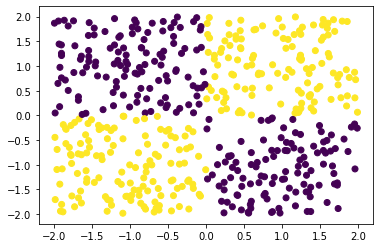

In [48]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y =np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

plt.scatter(x[:,0], x[:,1], c=y)

**3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.**

In [0]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x^{2}+200*x - 200*y^{2}
    df_dy = 400*y*(y^{2}-x)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

In [0]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

**3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.**

In [0]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

In [0]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, learning_rate=2)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

**3.6 Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.**



---

